# Project 2

# Used Vehicle Price Prediction

#### Angie Paola Chacon Pinzon: 201012536
#### Jahir Stevens Rodriguez Riveros: 201819361
#### Juan Andres Cabal Jaramillo: 200620778
#### David Tavera Sánchez: 201016123

In [7]:
# Manipulación de los datos
import pandas as pd; pd.set_option('display.max_columns', None)
import numpy as np

# Estadísticas
from scipy import stats
import statistics

# Modelaje
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor

# Visualización
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Progreso
from tqdm.notebook import trange, tqdm_notebook

ModuleNotFoundError: No module named 'tqdm.notebook'

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [15]:
data = pd.read_csv('../P2ModelosAvanzados1/datasets/dataTrain_carListings.zip')

In [16]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [4]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

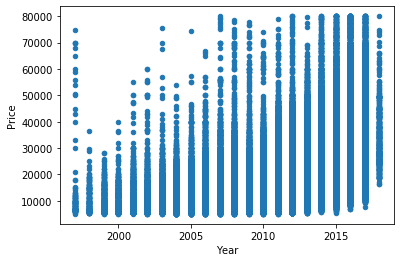

In [5]:
data.plot(kind='scatter', y='Price', x='Year')

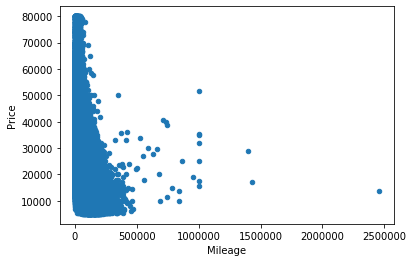

In [6]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [7]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    500000 non-null  int64 
 1   Year     500000 non-null  int64 
 2   Mileage  500000 non-null  int64 
 3   State    500000 non-null  object
 4   Make     500000 non-null  object
 5   Model    500000 non-null  object
dtypes: int64(3), object(3)
memory usage: 22.9+ MB


In [60]:
# Construimos las base de datos con las variables predictoras y la variable de respuesta.

# Conjunto de predictores
X_cat = data[['State', 'Make', 'Model']]
X_num = data[['Year', 'Mileage']]

X = pd.get_dummies(X_cat, drop_first = True)
X = pd.concat([X_num, X], axis=1, sort = False)

# Variable a predecir
y = data[['Price']]

print("Dimensión de los predictores:", X.shape)
print("Dimensión objetivo:", y.shape)

Dimensión de los predictores: (500000, 613)
Dimensión objetivo: (500000, 1)


# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process. 


### Bagging

#### Decision Tree Regressor

In [70]:
states = pd.get_dummies(data['State'])
makes = pd.get_dummies(data['Make'])
models = pd.get_dummies(data['Model'])
df = pd.concat([data[['Price', 'Year', 'Mileage']], states, makes, models], axis = 1)
df.shape

(500000, 617)

In [73]:
K = 10
N = data.shape[0]
acc = []

y = 'Price'

for i in tqdm_notebook(range(0,K)):
    X_test = df.loc[i*(N/K):(i+1)*(N/K)-1,]
    y_test = X_test[y]
    X_train = df.loc[set(data.index) - set(X_test.index),]
    y_train = X_train[y]
    X_test = X_test.drop(columns = y)
    X_train = X_train.drop(columns = y)
    clf = DecisionTreeRegressor(max_depth = None, random_state = 42)
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    acc.append(['RF',i, mean_squared_error(y_hat,y_test)])
    print ('RF iteración {} mse {}'.format(i, np.sqrt(mean_squared_error(y_hat,y_test))))

RF iteración 0 mse 4801.540622245261
RF iteración 1 mse 4712.8234246468255
RF iteración 2 mse 4701.985255471404
RF iteración 3 mse 4688.74915663998
RF iteración 4 mse 4687.069639958375
RF iteración 5 mse 4748.64683493769
RF iteración 6 mse 4780.043565118961
RF iteración 7 mse 4746.493734082468
RF iteración 8 mse 4787.364199674261
RF iteración 9 mse 4748.01220089719



In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dimensión Train:", X_train.shape)
print("Dimensión Test:", y_test.shape)

# set a seed for reproducibility
np.random.seed(42)

n_samples = X_train.shape[0]
n_B = 10

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a = n_samples, size = n_samples, replace = True) for _ in range(1, n_B + 1)]

Dimensión Train: (350000, 613)
Dimensión Test: (150000, 1)


In [54]:
RMSE = []
for t in tqdm_notebook(range(25, 35)):
    # grow each tree deep
    treereg = DecisionTreeRegressor(max_depth = t, random_state = 42)

    # DataFrame for storing predicted price from each tree
    y_pred = pd.DataFrame(index=y_test.index, columns=[list(range(n_B))])

    # grow one tree for each bootstrap sample and make predictions on testing data
    for i, sample in enumerate(samples):
        X = X_train.iloc[sample, 0:]
        y = y_train.iloc[sample]
        treereg.fit(X, y)
        y_pred[[i]] = treereg.predict(X_test)
        
    y_pred.mean(axis=1)
    RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred.mean(axis=1))))

Text(0, 0.5, 'RMSE (lower is better)')

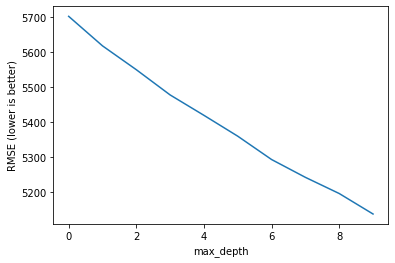

In [55]:
# Gráfica del RMSE
plt.plot(RMSE)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

Como primer modelo de predicción implementamos un  árbol de decisión con 10 Fold Cross Validation. Para calibrar el modelo, escogemos, como primera opción, que la profundidad máxima del árbol sea igual a todos los nodos expandidos, en cuyo caso el RMSE es igual a 4,800. Luego de esto, iteramos para ver si reduciendo la profundidad del árbol el RMSE es menor, lo que permite concluir que utilizando una profundidad entre 25 y 35 el RMSE sigue siendo mayor a cuando la profundidad es máxima.

#### Rotation Forest

In [56]:
x_train, x_test_all, y_train, y_test_all = train_test_split(X, y, test_size = 0.3, random_state = 42)
x_dev, x_test, y_dev, y_test = train_test_split(x_test_all, y_test_all, test_size = 0.3, random_state = 9)

In [57]:
np.random.seed(42)
def get_random_subset(iterable, k):
    
    subsets = []
    iteration = 0
    np.random.shuffle(iterable)
    subset = 0
    limit = len(iterable)/k
    
    while iteration < limit:
        if k <= len(iterable):
            subset = k
        else:
            subset = len(iterable)
        subsets.append(iterable[-subset:])
        del iterable[-subset:]
        iteration+=1
        return subsets

def build_rotationtree_model(x_train, y_train, d, k):
    
    models = []
    r_matrices = []
    feature_subsets = []
    
    for i in tqdm_notebook(range(d)):
        x,_,_,_ = train_test_split(x_train, y_train, test_size = 0.3, random_state = 7)
        # Features ids
        feature_index = list(range(x.shape[1]))
        # Get subsets of features
        random_k_subset = get_random_subset(feature_index,k)
        feature_subsets.append(random_k_subset)
        # Rotation matrix
        R_matrix = np.zeros((x.shape[1],x.shape[1]),dtype=float)
        for each_subset in random_k_subset:
            pca = PCA()
            x_subset = x.iloc[:,each_subset]
            pca.fit(x_subset)
            for ii in range(0,len(pca.components_)):
                for jj in range(0,len(pca.components_)):
                    R_matrix[each_subset[ii],each_subset[jj]] = pca.components_[ii,jj]
                
        x_transformed = x_train.dot(R_matrix)
        
        model = DecisionTreeRegressor()
        model.fit(x_transformed,y_train)
        models.append(model)
        r_matrices.append(R_matrix)
    return models, r_matrices, feature_subsets
    
def model_worth(models, r_matrices, x, y):
    
    predicted_ys = []
    mses = []
    for i,model in tqdm_notebook(enumerate(models)):
        x_mod =  x.dot(r_matrices[i])
        predicted_y = model.predict(x_mod)
        predicted_ys.append(predicted_y)
        
        mse = np.sqrt(mean_squared_error(y, predicted_y))
        mses.append(mse)
        
        mse_avg = statistics.mean(mses) 
    
    print(mse_avg)

In [58]:
models, r_matrices, features = build_rotationtree_model(x_train, y_train, 10, 200)

Adicional al modelo de Random Forest, intentamos aplicar un Rotatio Forest en donde se se combina un Random Forest junto con componentes principales. Lo anterior con el fin de ver si al reducir la dimensionalidad de la base la predicción mejora. Sin embargo, al correr el modelo con 10 árboles y utilizando 200 variables el RSME sigue siendo superior al árbol de decisión.

### Boosting

#### Gradient Boosting

Para la ejecución de algoritmos boosting se establece usar Gradient Boosting con la siguiente configuración de parámetros:
- learning_rate = np.arange(0.2, 1, 0.2)
- n_estimator = range(200, 600, 100)
- max_depth = range(9, 15, 3)

Para cada parámetro tenemos la siguiente definición:
- Learning rate:  0<𝜂≤1. Fracción de los componentes de un árbol que serán usadas para la estimación del siguiente árbol. Es usado para mejorar la generalización del árbol. Cuando más pequeño es el parámetro es mejor la generalización que hace. Cuándo el valor es 1, significa que se usan todos los componentes del árbol actual para crear el siguiente árbol
- n_estimator: Número de árboles que serán construidos y agregados, cuanto más árboles se usen se espera que la predicción correcta sea más probable
- max_depth: Profundidad máxima de cada árbol. Es un mecanismo de poda para evitar el sobreajuste

In [59]:
# list of values to try for max_features
learning_range = np.arange(0.2, 1, 0.2)
n_estimator_range = range(200, 600, 100)
max_depth_range = range(9, 15, 3)

# list to store the average Accuracy for each value of max_features
#accuracy_scores = []

for lr in learning_range:
    for n in n_estimator_range:
        for m in max_depth_range:
            now()
            clf = GradientBoostingRegressor(random_state=0, learning_rate = lr, n_estimators=n,max_depth=m)
            clf.fit(X_train,y_train)
            y_pred=clf.predict(X_test)
            mse=metrics.mean_squared_error(y_pred,y_test)
            print('learning_range {}, n_estimators {}, max_depth {}, mse {}'.format(lr,n, m, mse))
            accuracy_scores.append([lr,n, m, mse])

Current Time = 15:19:55
learning_range 0.2, n_estimators 200, max_depth 9, mse 13992596.11665118
Current Time = 16:12:36


#### XGBoost
En la construcción del modelo usando este algoritmo se prueba una estrategia de preparación de datos diferente.
Esta preparación de datos considera las siguientes situaciones:
- El modelo del carro depende exclusivamente de la marca, por lo que se considera que la variable 'Maker' puede ser omitida
- El modelo del carro está compuesto por dos clases de información: la primera habla del modelo base del vehículo, mientras que la segunda habla de la gama dentro del modelo. De este modo se crea una nueva columna ModelT que toma sólamente el modelo base del vehículo, para hacer el entrenamiento


Los parámetros que se explorarán están explicados a continuación:
- Learning rate:  0<𝜂≤1. Fracción de los componentes de un árbol que serán usadas para la estimación del siguiente árbol. Es usado para mejorar la generalización del árbol. Cuando más pequeño es el parámetro es mejor la generalización que hace. Cuándo el valor es 1, significa que se usan todos los componentes del árbol actual para crear el siguiente árbol
- gamma: Ganancia mínima que debe superar una partición para ser incluida en el árbol. Es un número entre [0,inf] y a medida que es más grande el árbol final es más simple.
- colsample_bytree: Fracción de las columnas que serán tomadas para la construcción de cada árbol. tiene un valor entre 0 y 1 siendo 1:"tomar todas las columnas"

In [19]:
from xgboost import XGBRegressor
data['ModelT']=data['Model'].str[:4]
states_xgb = pd.get_dummies(data['State'])
models_xgb = pd.get_dummies(data['ModelT'])
df_xgb = pd.concat([data[['Price', 'Year', 'Mileage']], states_xgb, models_xgb], axis = 1)

y_xgb = df_xgb['Price']
X_xgb = df_xgb.drop(['Price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_xgb, y_xgb, test_size=0.33, random_state=42)
def now():
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print("Current Time =", current_time)

In [20]:
from sklearn.externals import joblib

# list of values to try for max_features
learning_range =sorted(np.arange(0.2, 1.2, 0.2),reverse=True)
gamma_range = sorted(range(1, 10),reverse=True)
colsample_range =sorted(np.arange(0.2, 1.2, 0.2),reverse=True)

# list to store the average Accuracy for each value of max_features
best_rmse=9999999
best_clf=XGBRegressor()
best_params=[]
for lr in learning_range:
    for g in gamma_range:
        for cs in colsample_range:
            now()
            clf = XGBRegressor(eta=lr, gamma=g,colsample_bytree=cs)
            clf.fit(X_train,y_train)
            y_pred=clf.predict(X_test)
            rmse=np.sqrt(metrics.mean_squared_error(y_pred,y_test))
            print ("RMSE:",rmse,"params: ",[lr,g,cs])
            if rmse<best_rmse:
                best_rmse=rmse
                best_clf=clf
                best_params=[lr,g,cs]
                print ("B_RMSE:",best_rmse,"B_params: ",best_params)

Current Time = 17:53:19
RMSE: 4144.303652068261 params:  []
B_RMSE: 4144.303652068261 B_params:  [1.0, 9, 1.0]
Current Time = 17:59:53
RMSE: 4159.298568798539 params:  [1.0, 9, 1.0]
Current Time = 18:04:32


KeyboardInterrupt: 

### Mejor Modelo:
Para las diferentes confuguraciones intentadas el mejor modelo conseguido fue <> con un RMSE de :

In [8]:
#Generacion de archivo para despliegue
data = pd.read_csv('../P2ModelosAvanzados1/datasets/dataTrain_carListings.zip')

states = pd.get_dummies(data['State'])
makes = pd.get_dummies(data['Make'])
models = pd.get_dummies(data['Model'])
df = pd.concat([data[['Price', 'Year', 'Mileage']], states, makes.drop(['Ram','Land'],axis=1), models], axis = 1).sample(50000)
y = df['Price']
X = df.drop(['Price'], axis=1)
X.shape

(50000, 614)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
best_clf = GradientBoostingRegressor(random_state=0, learning_rate = 0.2, n_estimators=300,max_depth=12)
best_clf.fit(X_train,y_train)


In [ ]:
#y_pred=clf.predict(X_test)
#rmse=metrics.mean_squared_error(y_pred,y_test)**0.5
from sklearn.externals import joblib
joblib.dump(best_clf, 'model_deployment/modeloGB.pkl', compress=3)

In [35]:
len(set(X_train.columns)),len(X_test.columns)

(614, 616)

# Exercise P2.2 (50%)

Create an API of the model.

Example:

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine


#### En máquina local

In [1]:
from flask import Flask
from flask_restplus import Api, Resource, fields
from sklearn.externals import joblib
from model_deployment.p2model_deployment import predict_price

C:\Users\david\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
predict_price(2015,1000,'AL','Audi','CX')

array([33828.93385324])

In [3]:

app = Flask(__name__)

api = Api(
    app, 
    version='1.0', 
    title='Price Prediction API G7',
    description='Angie Paola Chacon Pinzon: 201012536\nJahir Stevens Rodriguez Riveros: 201819361\nJuan Andres Cabal Jaramillo: 200620778\nDavid Tavera Sánchez: 201016123')

ns = api.namespace('predict', 
     description='Price Regressor')
   
parser = api.parser()

parser.add_argument(
    'Year', 
    type=int, 
    required=True, 
    help='Year of the car to be analyzed', 
    location='args')

parser.add_argument(
    'Mileage', 
    type=int, 
    required=True, 
    help='Mileage of the car to be analyzed', 
    location='args')

parser.add_argument(
    'State', 
    type=str, 
    required=True, 
    help='State of the car to be analyzed', 
    location='args')

parser.add_argument(
    'Make', 
    type=str, 
    required=True, 
    help='Maker of the car to be analyzed', 
    location='args')

parser.add_argument(
    'Model', 
    type=str, 
    required=True, 
    help='Model of the car to be analyzed', 
    location='args')


resource_fields = api.model('Resource', {
    'price': fields.Integer,
})

@ns.route('/')
class PriceApi(Resource):

    @api.doc(parser=parser)
    @api.marshal_with(resource_fields)
    def get(self):
        args = parser.parse_args()
        
        return {
         "price": predict_price(args['Year'],args['Mileage'],args['State'],args['Make'],args['Model'])
        }, 200

In [5]:
app.run(debug=True, use_reloader=False, host='0.0.0.0', port=5000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Jun/2020 21:14:58] "GET /predict/?Year=2015&Mileage=10000&State=AL&Make=audi&Model=CX HTTP/1.1" 200 -
127.0.0.1 - - [29/Jun/2020 21:14:58] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [29/Jun/2020 21:16:47] "GET /predict/?Year=2020&Mileage=20000&State=AL&Make=audi&Model=CX HTTP/1.1" 200 -
127.0.0.1 - - [29/Jun/2020 21:18:56] "GET /predict/?Year=2015&Mileage=20000&State=AL&Make=audi&Model=CX HTTP/1.1" 200 -
127.0.0.1 - - [29/Jun/2020 21:19:46] "GET /predict/?Year=2010&Mileage=20000&State=AL&Make=audi&Model=CX HTTP/1.1" 200 -
127.0.0.1 - - [29/Jun/2020 21:19:54] "GET /predict/?Year=2010&Mileage=100000&State=AL&Make=audi&Model=CX HTTP/1.1" 200 -
127.0.0.1 - - [29/Jun/2020 21:20:08] "GET /predict/?Year=2010&Mileage=10&State=AL&Make=audi&Model=CX HTTP/1.1" 200 -
127.0.0.1 - - [29/Jun/2020 21:20:17] "GET /predict/?Year=2013&Mileage=10&State=AL&Make=audi&Model=CX HTTP/1.1" 200 -


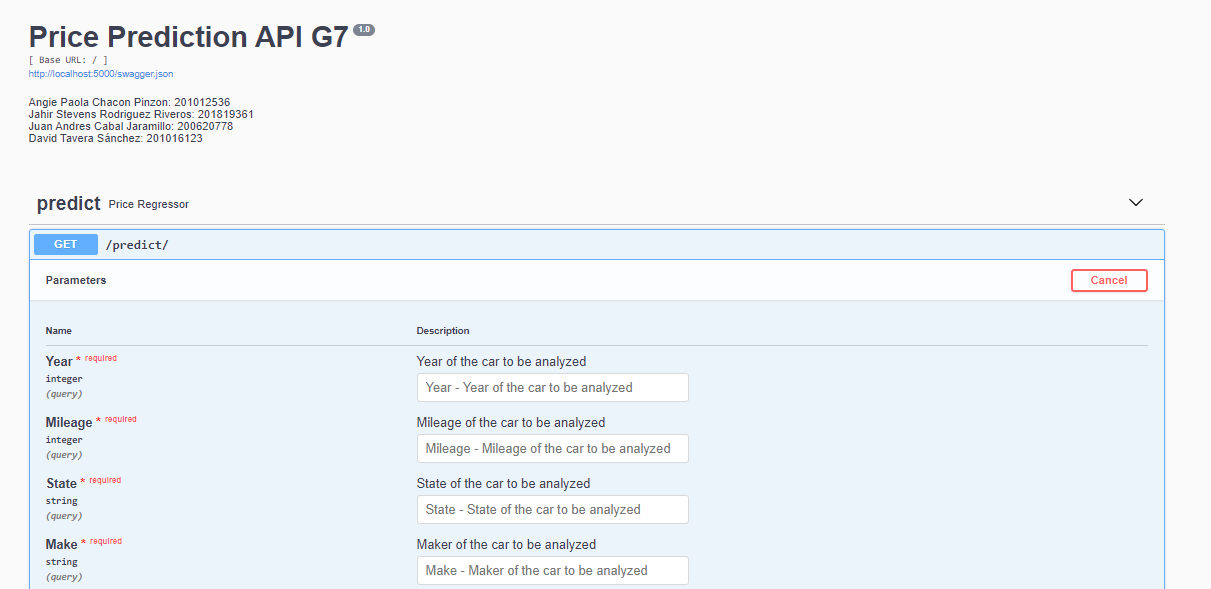

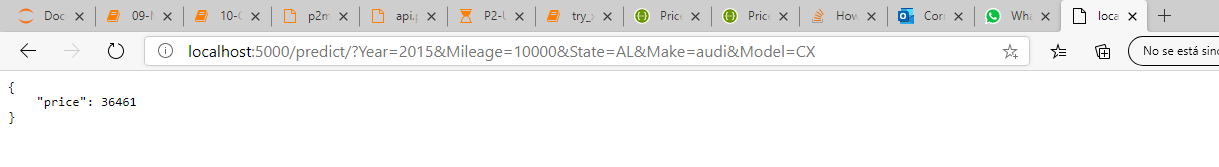
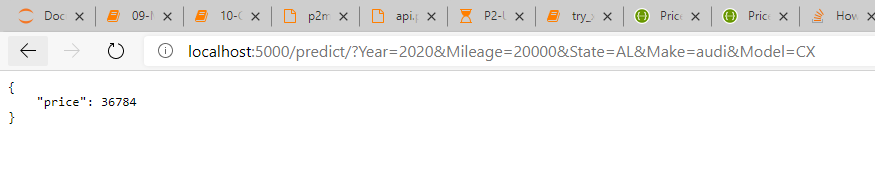
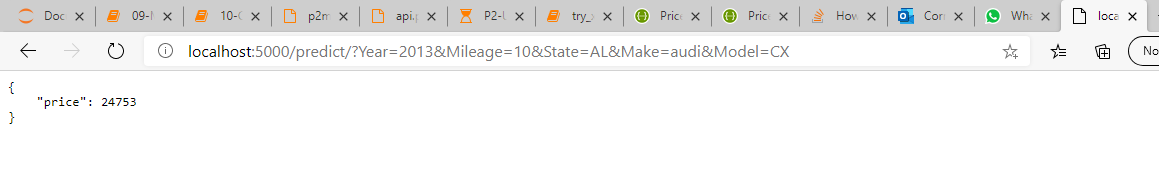